# Assignment 0 : Value Prediction
* Amirhossein Abaskohi
* STD: 810197539
* ECE School, Faculty of Engineering, University of Tehran, Tehran, Iran 

# Introduction:

In this assignment we are going to use some python modules to fix defects in a dataset. Here we need some statistical calculation to predict values that are unknown in our dataset to complete dataset.

## Description:

First there is a csv file that is our dataset. This dataset has some numerical and some categorical data. For prediction we need those numerical data. First there is an introduction to dataset. Using some pandas method we can see, get information, and change the dataset. After reading and modifying some dataset, we zoom on numerical data and normalize them. Now using those normal data and their plot we should choose parameter for predict unknown values and predict them.
<hr style="border:1px solid gray"> </hr>

Here is importing the modules tht we need. Pandas is a module to work with data as Series, DataFrame, and PanelData. Numpy is like pandas but in simple version and has some useful numerical functions and methods. Matplotllib is for plotting and scipy is used for statistical calculation. Also time is added for calculating execution time that used in part 7.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import time
pd.options.mode.chained_assignment = None

Below we read out dataset csv file using pandas. As first column in dataset is Id or Index we set that as pandas DataFrame index with setting index_col argument to zero.

In [2]:
advertisingDF = pd.read_csv("advertising_dataset.csv", index_col=0)

Head method shows first top 5 rows in DataFrame. Also it gets number of rows to show, for example head(20) show first 20 rows. Default it shows 5 top rows.
Tail is like head but shows down rows.
Describe method shows us sum statistical information like mean, standart deviation(std), max, min, and quartiles for each numerical column.
Info method shows us type of each column and number of not-null values in there.

##### These methods help us to get some information about our dataset. For example now we know that other than Clicked on Ad columns (that is our goal column) there is null values in other columns and we should find a solution for that. Also we get that there 5 important numerical values that can help us to get information and predict for unknown goal cells.

In [3]:
advertisingDF.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


In [4]:
advertisingDF.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


In [5]:
advertisingDF.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,64.794818,36.009193,55000.000080,179.751271,0.496394
std,15.954841,8.783636,13414.634022,43.957934,0.500288
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,78.555000,42.000000,65470.635000,217.850000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [6]:
advertisingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  907 non-null    float64
 1   Age                       979 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      913 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             832 non-null    float64
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


Some times we need to change the label of our columns. Usually we change categorical labels to some numberical or boolean labels, although we can use another categorical data. Using numerical instead of categoorical help us in plotting and calculation. To do this you can use relace method.
Here I changed Gender to a numberical value.

In [7]:
genderLabelEncodes = { "Gender": {"Male": 1, "Female": 0} } 

In [8]:
advertisingDF.replace(genderLabelEncodes, inplace=True)

In [9]:
advertisingDF

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


Based on part 3 we should replace null-values of column in rows which their goal column is not null.
So I replace null values using fillna method by their means.

Then we concat those seprated data frames into one dataframe and sort them by index.

<hr style="border:1px solid gray"> </hr>

## Handeling Missing Values In Data Set

In real world data, there are some instances where a particular element is absent because of various reasons, such as, corrupt data, failure to load the information, or incomplete extraction.

One way that was mentioned in assignment description is using mean value. Here are some other ways:

- Deleting Rows: Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

- Predicting The Missing Values: Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm.

As mentioned, removing rows is a good way but here that our data is not little, it is better to use replacing data. This replacement can be done using mean(like what happened here), median, or mode. Here it doesn't make any problem to use mean because data are near to each other.

Source: https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/

In [10]:
advertisingDF.isna().sum()

Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

In [11]:
advertisingDF.loc[:, advertisingDF.columns.difference(['Clicked on Ad'])] = advertisingDF.loc[:, advertisingDF.columns.difference(['Clicked on Ad'])].fillna(advertisingDF.mean())
advertisingDF.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.950000,35.000000,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.230000,31.000000,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.470000,26.000000,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.150000,29.000000,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.370000,35.000000,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
5,59.990000,23.000000,59761.56,226.740000,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0.0
6,88.910000,33.000000,53852.85,208.360000,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0.0
7,66.000000,48.000000,24593.33,131.760000,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1.0
8,74.530000,30.000000,68862.00,221.510000,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0.0
9,69.880000,20.000000,55642.32,183.820000,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0.0


Now we want to show that how many users are male and how many are females. Then we dio this for Click on Ad column.
Using value_count method we have different type of values in that column and number of repetitions of  each one.

In [12]:
numberOfMales = advertisingDF['Gender'].value_counts()[1]
numberOfFemales = advertisingDF['Gender'].value_counts()[0]
print("numberOfFemaleUsers:" + str(numberOfFemales))
print("numberOfMaleUsers:" + str(numberOfMales))

numberOfFemaleUsers:519
numberOfMaleUsers:481


In [13]:
numberOfClicks = advertisingDF['Clicked on Ad'].value_counts()[1]
numberOfUnclicks = advertisingDF['Clicked on Ad'].value_counts()[0]
print("numberOfClicks:" + str(numberOfClicks))
print("numberOfUnclicks:" + str(numberOfUnclicks))
print("UnknownClick:" + str(1000 - numberOfClicks - numberOfUnclicks))

numberOfClicks:413
numberOfUnclicks:419
UnknownClick:168


Here we use filtering dataframe based on age(that should be grater that my age that is 20) and their gender(that sould bre like mine, male). First we introduce our filter condition then apply that on dataframe.
Number of rows are users who are in my gender and have greater age. For finding number of rows we use shape property of dateframe that is a list. First value of this property is number of rows.

In [14]:
myTypesFilter = (advertisingDF['Gender']) == 1 & (advertisingDF['Age'] > 20)
numberOfMyTypes = advertisingDF[myTypesFilter].shape[0]
print("Number of users who are in my gender and with higher age: " + str(numberOfMyTypes))

Number of users who are in my gender and with higher age: 475


For simple calculating we use groupby method to group our dataframe based on Clicked on Ad column then we calculate mean of all columns and pick mena of Age column.
Another way to do this is using loop(without vectorization), that we loop into rows and sum Clicked on Ad column values and then devide it by number of values in each group.

As you can see first method faster than the second one. Here is the reason:
Pandas method are based on vectorization that means it calcuates them parallel, but when using loop it's not parallel and each some happens after another. So Although in first method we calculate mean for all columns it's so faster.

In [15]:
start1 = time.time()
Means = advertisingDF.groupby(['Clicked on Ad']).mean()['Age']
end1 = time.time()
print(Means)

Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64


In [16]:
start2 = time.time()
sumAgeClicked = 0
countAgeClicked = 0
sumAgeUnclicked = 0
countAgeUnclicked = 0
for index, row in advertisingDF.iterrows():
    if(row['Clicked on Ad'] == 1):
        sumAgeClicked += row['Age']
        countAgeClicked += 1
    elif(row['Clicked on Ad'] == 0):
        sumAgeUnclicked += row['Age']
        countAgeUnclicked += 1
clickedMean = sumAgeClicked/countAgeClicked
unClickedMean = sumAgeUnclicked/countAgeUnclicked
end2 = time.time()
print("0.0    " + str(unClickedMean))
print("1.0    " + str(clickedMean))

0.0    31.723325881701896
1.0    40.295599848637366


In [17]:
print(end1 - start1)
print(end2 - start2)

0.05780982971191406
0.11095809936523438


Here using hist method we plot histogram of our columns. Here histogram of Age, Daily Time Spent on Site, Area Income, and Daily internet usage shows us that distribution of these columns is like normal distribution.
Although Gender and Clicked on Ad are uniform and showing us that we have nearly equal number of males and females and equal number of clicks and not-clicks.

array([[<AxesSubplot:title={'center':'Daily Time Spent on Site'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Area Income'}>,
        <AxesSubplot:title={'center':'Daily Internet Usage'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Clicked on Ad'}>]], dtype=object)

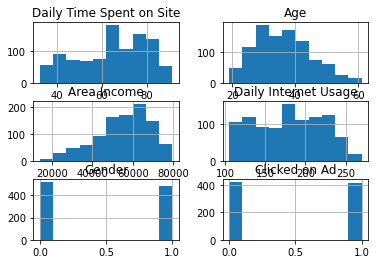

In [18]:
advertisingDF.hist()

### Cause from here we don't need categorical columns, we drop them.

In [19]:
numericalAdDF = advertisingDF.copy()
numericalAdDF.drop(columns=['Gender', 'Timestamp', 'City', 'Ad Topic Line', 'Country'], inplace=True)

In statistics and applications of statistics, normalization can have a range of meanings.In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging. In more complicated cases, normalization may refer to more sophisticated adjustments where the intention is to bring the entire probability distributions of adjusted values into alignment. In the case of normalization of scores in educational assessment, there may be an intention to align distributions to a normal distribution. A different approach to normalization of probability distributions is quantile normalization, where the quantiles of the different measures are brought into alignment.

In another usage in statistics, normalization refers to the creation of shifted and scaled versions of statistics, where the intention is that these normalized values allow the comparison of corresponding normalized values for different datasets in a way that eliminates the effects of certain gross influences, as in an anomaly time series. Some types of normalization involve only a rescaling, to arrive at values relative to some size variable. In terms of levels of measurement, such ratios only make sense for ratio measurements (where ratios of measurements are meaningful), not interval measurements (where only distances are meaningful, but not ratios).

In theoretical statistics, parametric normalization can often lead to pivotal quantities – functions whose sampling distribution does not depend on the parameters – and to ancillary statistics – pivotal quantities that can be computed from observations, without knowing parameters.

There are differnet types of normalization that you can see it below:

![image info](./1.png)

So here based on first method, normalize function is calculating this too.

Source: https://en.wikipedia.org/wiki/Normalization_(statistics)

In [20]:
def normalize(df):
    dfStd = df.copy()
    for column in dfStd.columns:
        if(column == 'Clicked on Ad'):
            continue
        dfStd[column] = (dfStd[column] - dfStd[column].mean()) / (dfStd[column].std())
    return dfStd
normalizedAdDF = normalize(numericalAdDF)
normalizedAdDF.head(30)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1.015870,-0.576377,1.002029,0.000000,0.0
2,0.307698,-1.151696,0.356770,1.351152,0.0
3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,0.235301,-0.116122,1.408163,1.091154,0.0
5,-0.316230,-1.496888,0.354953,1.118772,0.0
6,1.587145,-0.346249,-0.085515,0.681156,0.0
7,0.079319,1.379709,-2.266679,-1.142642,1.0
8,0.640723,-0.691441,1.033349,0.994249,0.0
9,0.334682,-1.842080,0.047882,0.096874,0.0


Here we are using groupby again to save standard devations and means.

For plotting pdf, first we choose 100 points between min and max of each column(after normaliztion). Then make normal of each normalized column based on their mean and standerd devation(cause two part of normal distribution is mean and standard devation)that we stored in stds and means. We do this for each group(clicked and unclicked)in each column.

In every plot red one is for unclick group and blue one is for 

In [21]:
stds = normalizedAdDF.groupby(['Clicked on Ad']).std()
means = normalizedAdDF.groupby(['Clicked on Ad']).mean()
mins = normalizedAdDF.groupby(['Clicked on Ad']).min()
maxs = normalizedAdDF.groupby(['Clicked on Ad']).max()

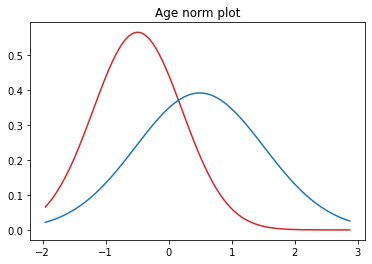

In [22]:
x = np.linspace(normalizedAdDF['Age'].min(), normalizedAdDF['Age'].max(), num = 100)
y1 = sp.norm(means['Age'][0], stds['Age'][0]).pdf(x)
y2 = sp.norm(means['Age'][1], stds['Age'][1]).pdf(x)
plt.plot(x, y1, color="tab:red")
plt.plot(x, y2, color="tab:blue")
plt.title('Age norm plot')
plt.show()

As we can see above, standard deviation of people who Clicked on Ad is more than who didn't, that means dispersion of this group is more than people who didn't.

Also average age of people who clicked on ads is more, so our goal group for advertisement is older people.

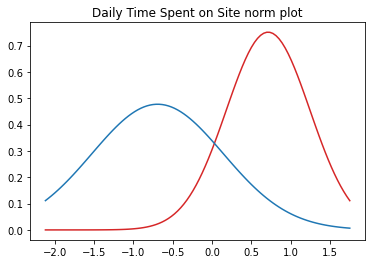

In [23]:
x = np.linspace(normalizedAdDF['Daily Time Spent on Site'].min(), normalizedAdDF['Daily Time Spent on Site'].max(), num = 100)
y1 = sp.norm(means['Daily Time Spent on Site'][0], stds['Daily Time Spent on Site'][0]).pdf(x)
y2 = sp.norm(means['Daily Time Spent on Site'][1], stds['Daily Time Spent on Site'][1]).pdf(x)
plt.plot(x, y1, color="tab:red")
plt.plot(x, y2, color="tab:blue")
plt.title('Daily Time Spent on Site norm plot')
plt.show()

As we can see above, standard deviation of people who Clicked on Ad is more than who didn't, that means dispersion of this group is more than people who didn't.

Also average daily spent time of people who clicked on ads is less, so our goal group for advertisement is people who spent less time.

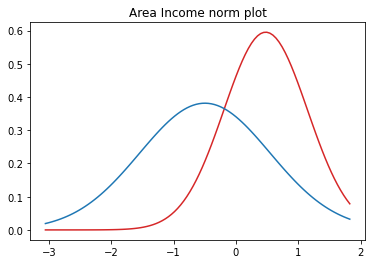

In [24]:
x = np.linspace(normalizedAdDF['Area Income'].min(), normalizedAdDF['Area Income'].max(), num = 100)
y1 = sp.norm(means['Area Income'][0], stds['Area Income'][0]).pdf(x)
y2 = sp.norm(means['Area Income'][1], stds['Area Income'][1]).pdf(x)
plt.plot(x, y1, color="tab:red")
plt.plot(x, y2, color="tab:blue")
plt.title('Area Income norm plot')
plt.show()

As we can see above, standard deviation of people who Clicked on Ad is more than who didn't, that means dispersion of this group is more than people who didn't.

Also average area income of people who clicked on ads is less, so our goal group for advertisement is poeple who have less are income.

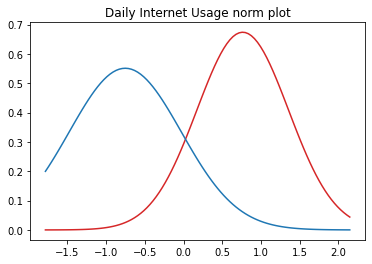

In [25]:
x = np.linspace(normalizedAdDF['Daily Internet Usage'].min(), normalizedAdDF['Daily Internet Usage'].max(), num = 100)
y1 = sp.norm(means['Daily Internet Usage'][0], stds['Daily Internet Usage'][0]).pdf(x)
y2 = sp.norm(means['Daily Internet Usage'][1], stds['Daily Internet Usage'][1]).pdf(x)
plt.plot(x, y1, color="tab:red")
plt.plot(x, y2, color="tab:blue")
plt.title('Daily Internet Usage norm plot')
plt.show()

As we can see above, standard deviation of people who Clicked on Ad is more than who didn't, that means dispersion of this group is more than people who didn't.

Also average internet usage of people who clicked on ads is less, so our goal group for advertisement is poeple who havs internet usage.

In [26]:
stds

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,
0.0,0.531369,0.706315,0.670476,0.592058
1.0,0.836161,1.019268,1.046199,0.723959


At all as we can see in plots and based on std of each group, we can say that standard deviation of Daily internet usage column is less than others, that is a vary good point that show that we don't have data dispersion, because of this we can see that arch of two group in last plot are near to each other. The last plot have a good propert that is high difference after collision of pdf of two groups.

Also we can say that people who have a little daily spent time, a little income, a little internet usage, and higher age are people who clicks on ads, so for having better income we can focus on this group.

#### Based on what said above, we choose Daily internet usage for prediction values, because of better standard deviation and good difference for decide that value that we need.

Here first using nearestValue function find nearset value in passed array into the pdfs(x value). Then check the value of pdf in two groups,anyone that has more value set the group 

In [27]:
def nearestValue(x, value):
    for i in range(len(x) - 1):
        if value > x[i] and value < x[i+1]:
            if(abs(value - x[i]) < abs(value - x[i+1])):
                return i
            else:
                return i+1
            
for index, row in advertisingDF.iterrows():
    if(pd.isnull(row['Clicked on Ad'])):
        nv = nearestValue(x, normalizedAdDF.iloc[index, normalizedAdDF.columns.get_loc('Daily Internet Usage')])
        if(y1[nv] > y2[nv]):
            advertisingDF['Clicked on Ad'][index] = 0
        else:
            advertisingDF['Clicked on Ad'][index] = 1

In [28]:
advertisingDF.to_csv('predicted_result.csv', mode='w')

# Conclusion:

One of the most important things that usually happens in datascience is facing with unknown and uncomplete datas. The unknown datas are very important for different fields deciding for goal community or hypothesis testing. So we should find a way to complete these fields. This filed here is Clicked on Ad column. We should use other data and using some probaility calculation such as calculating the PDF, CDF, density, and other things like these on them, find out the wanted values. In this way using standard deviation, means, and plots
can help us a lot.